In [1]:
import pandas as pd

In [12]:
df_bog=pd.read_csv(r"D:\Hoom\BOGZ1FL073165103Q.csv")
df_gdp=pd.read_csv(r"D:\Hoom\GDP.csv")
df_mspus=pd.read_csv(r"D:\Hoom\MSPUS.csv")
df_unrate=pd.read_csv(r"D:\Hoom\UNRATE.csv")
df_hsn1f=pd.read_csv(r"D:\Hoom\HSN1F.csv")
df_msacsr=pd.read_csv(r"D:\Hoom\MSACSR.csv")

In [13]:
df_m1 = pd.merge(df_bog,df_gdp, how="outer", on=["DATE"])
df_m2 = pd.merge(df_mspus,df_unrate, how="outer", on=["DATE"])
df_m3 = pd.merge(df_hsn1f,df_msacsr, how="outer", on=["DATE"])

In [14]:
df_f1 = pd.merge(df_m1,df_m2, how="outer", on=["DATE"])

In [15]:
final_df = pd.merge(df_f1,df_m3, how="outer", on=["DATE"])

In [16]:
final_df

,DATE,BOGZ1FL073165103Q,GDP,MSPUS,UNRATE,HSN1F,MSACSR
0,1971-01-01,7330.0,1135.156,24300.0,5.9,618.0,4.3
1,1971-04-01,7429.0,1156.271,25800.0,5.9,662.0,4.2
2,1971-07-01,7668.0,1177.675,25300.0,6.0,706.0,4.1
3,1971-10-01,7544.0,1190.297,25500.0,5.8,647.0,5.0
4,1972-01-01,7349.0,1230.609,26200.0,5.8,698.0,5.2
...,...,...,...,...,...,...,...
898,2022-06-01,NaN,NaN,NaN,3.6,571.0,9.4
899,2022-08-01,NaN,NaN,NaN,3.7,661.0,8.3
900,2022-09-01,NaN,NaN,NaN,3.5,588.0,9.4
901,2022-10-01,NaN,NaN,NaN,3.7,632.0,8.9


In [17]:
final_df.rename(columns={'BOGZ1FL073165103Q':'price_indices',
                         'GDP':'gross_domestic_product',
                         'MSPUS':'salesprice_median',
                         'UNRATE':'unemployment_rate',
                         'HSN1F':'houses_sold_new_onefamily',
                         'MSACSR':'monthly_supply_of_newhouses'}, inplace=True)

In [18]:
final_df

,DATE,price_indices,gross_domestic_product,salesprice_median,unemployment_rate,houses_sold_new_onefamily,monthly_supply_of_newhouses
0,1971-01-01,7330.0,1135.156,24300.0,5.9,618.0,4.3
1,1971-04-01,7429.0,1156.271,25800.0,5.9,662.0,4.2
2,1971-07-01,7668.0,1177.675,25300.0,6.0,706.0,4.1
3,1971-10-01,7544.0,1190.297,25500.0,5.8,647.0,5.0
4,1972-01-01,7349.0,1230.609,26200.0,5.8,698.0,5.2
...,...,...,...,...,...,...,...
898,2022-06-01,NaN,NaN,NaN,3.6,571.0,9.4
899,2022-08-01,NaN,NaN,NaN,3.7,661.0,8.3
900,2022-09-01,NaN,NaN,NaN,3.5,588.0,9.4
901,2022-10-01,NaN,NaN,NaN,3.7,632.0,8.9


In [19]:
df_clean=final_df.dropna(axis=0)
df_clean=df_clean.drop_duplicates()

In [29]:
df_clean

,DATE,price_indices,gross_domestic_product,salesprice_median,unemployment_rate,houses_sold_new_onefamily,monthly_supply_of_newhouses
0,1971-01-01,7330.0,1135.156,24300.0,5.9,618.0,4.3
1,1971-04-01,7429.0,1156.271,25800.0,5.9,662.0,4.2
2,1971-07-01,7668.0,1177.675,25300.0,6.0,706.0,4.1
3,1971-10-01,7544.0,1190.297,25500.0,5.8,647.0,5.0
4,1972-01-01,7349.0,1230.609,26200.0,5.8,698.0,5.2
...,...,...,...,...,...,...,...
202,2021-07-01,2864.0,23550.420,411200.0,5.4,726.0,6.0
203,2021-10-01,3079.0,24349.121,423600.0,4.6,671.0,6.9
204,2022-01-01,3822.0,24740.480,433100.0,4.0,831.0,5.7
205,2022-04-01,5266.0,25248.476,449300.0,3.6,619.0,8.4


In [27]:
plots = df_clean.copy()

In [32]:
plots['Date'] = pd.to_datetime(plots['DATE'], errors='coerce')

In [33]:
plots['Year'] = plots['Date'].dt.year

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

<AxesSubplot:xlabel='Year', ylabel='price_indices'>

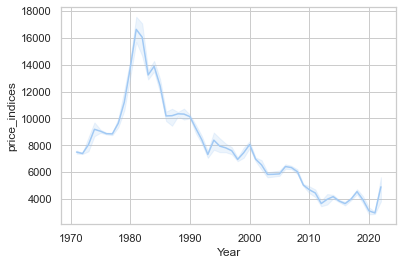

In [40]:
sns.lineplot(data=plots, x="Year", y="price_indices")

<AxesSubplot:xlabel='Year', ylabel='gross_domestic_product'>

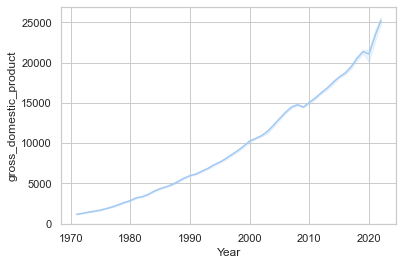

In [41]:
sns.lineplot(data=plots, x="Year", y="gross_domestic_product")

<AxesSubplot:xlabel='Year', ylabel='salesprice_median'>

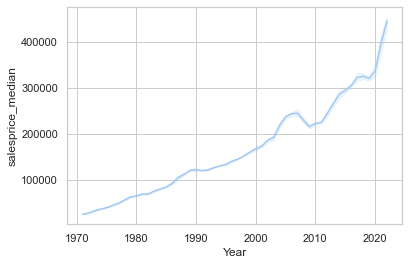

In [42]:
sns.lineplot(data=plots, x="Year", y="salesprice_median")

<AxesSubplot:xlabel='Year', ylabel='unemployment_rate'>

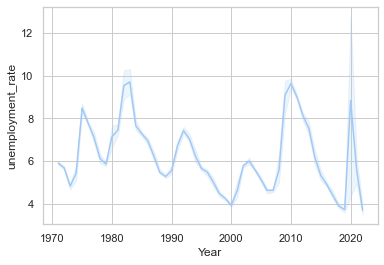

In [43]:
sns.lineplot(data=plots, x="Year", y="unemployment_rate")houses_sold_new_onefamily

<AxesSubplot:xlabel='Year', ylabel='houses_sold_new_onefamily'>

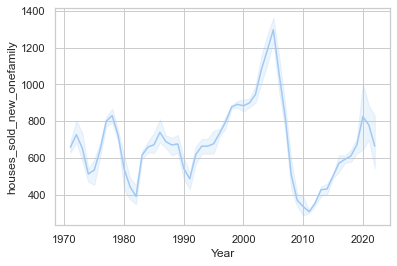

In [44]:
sns.lineplot(data=plots, x="Year", y="houses_sold_new_onefamily")monthly_supply_of_newhouses

<AxesSubplot:xlabel='Year', ylabel='monthly_supply_of_newhouses'>

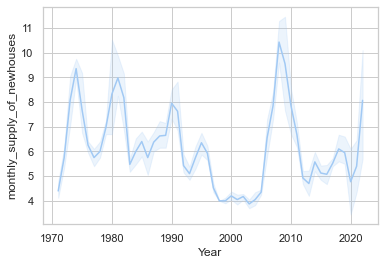

In [45]:
sns.lineplot(data=plots, x="Year", y="monthly_supply_of_newhouses")